# Instance segmentation with YOLOv8

## Some imports and installations

In [ ]:
!pip install -q ultralytics==8.0.28 roboflow

In [ ]:
# to insure there is GPU available on colab
!nvidia-smi

Wed May 17 16:25:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import glob

import ultralytics

from IPython import display
display.clear_output()

from roboflow import Roboflow
ultralytics.checks()

HOME = os.getcwd()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


## Get data and model

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="Zb4pcvMi97a7q432SywJ")

project = rf.workspace("whereareyousolarpanel").project("solar-pv-panel-detection")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to solar-pv-panel-detection-3 in yolov8:: 100%|██████████| 3184/3184 [00:01<00:00, 3015.35it/s]


## Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=415

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/solar-pv-panel-detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=415, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					     train_batch0.jpg
BoxF1_curve.png					     train_batch1350.jpg
BoxP_curve.png					     train_batch1351.jpg
BoxPR_curve.png					     train_batch1352.jpg
BoxR_curve.png					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1684344447.172e3b987c2a.18869.0  val_batch0_labels.jpg
MaskF1_curve.png				     val_batch0_pred.jpg
MaskP_curve.png					     val_batch1_labels.jpg
MaskPR_curve.png				     val_batch1_pred.jpg
MaskR_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights


/content


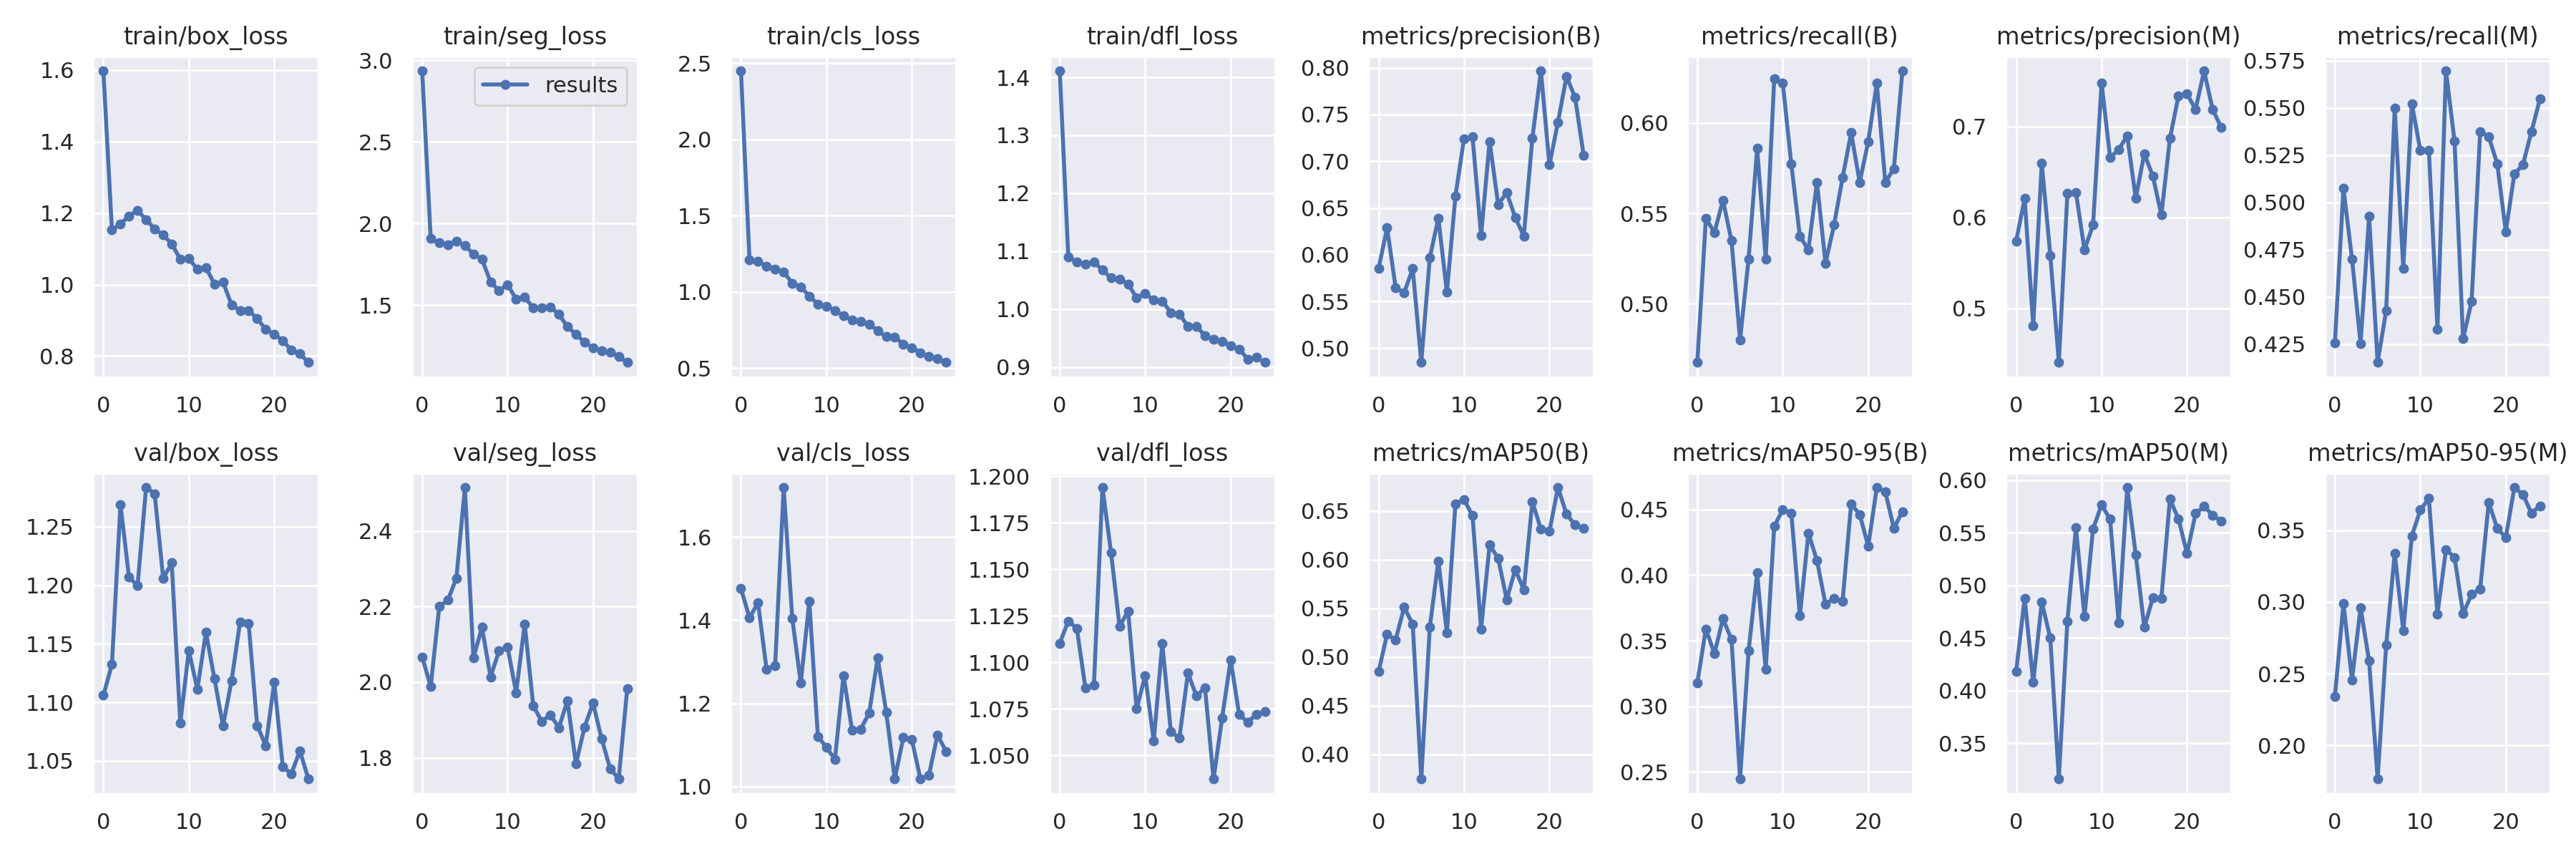

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=800)

/content


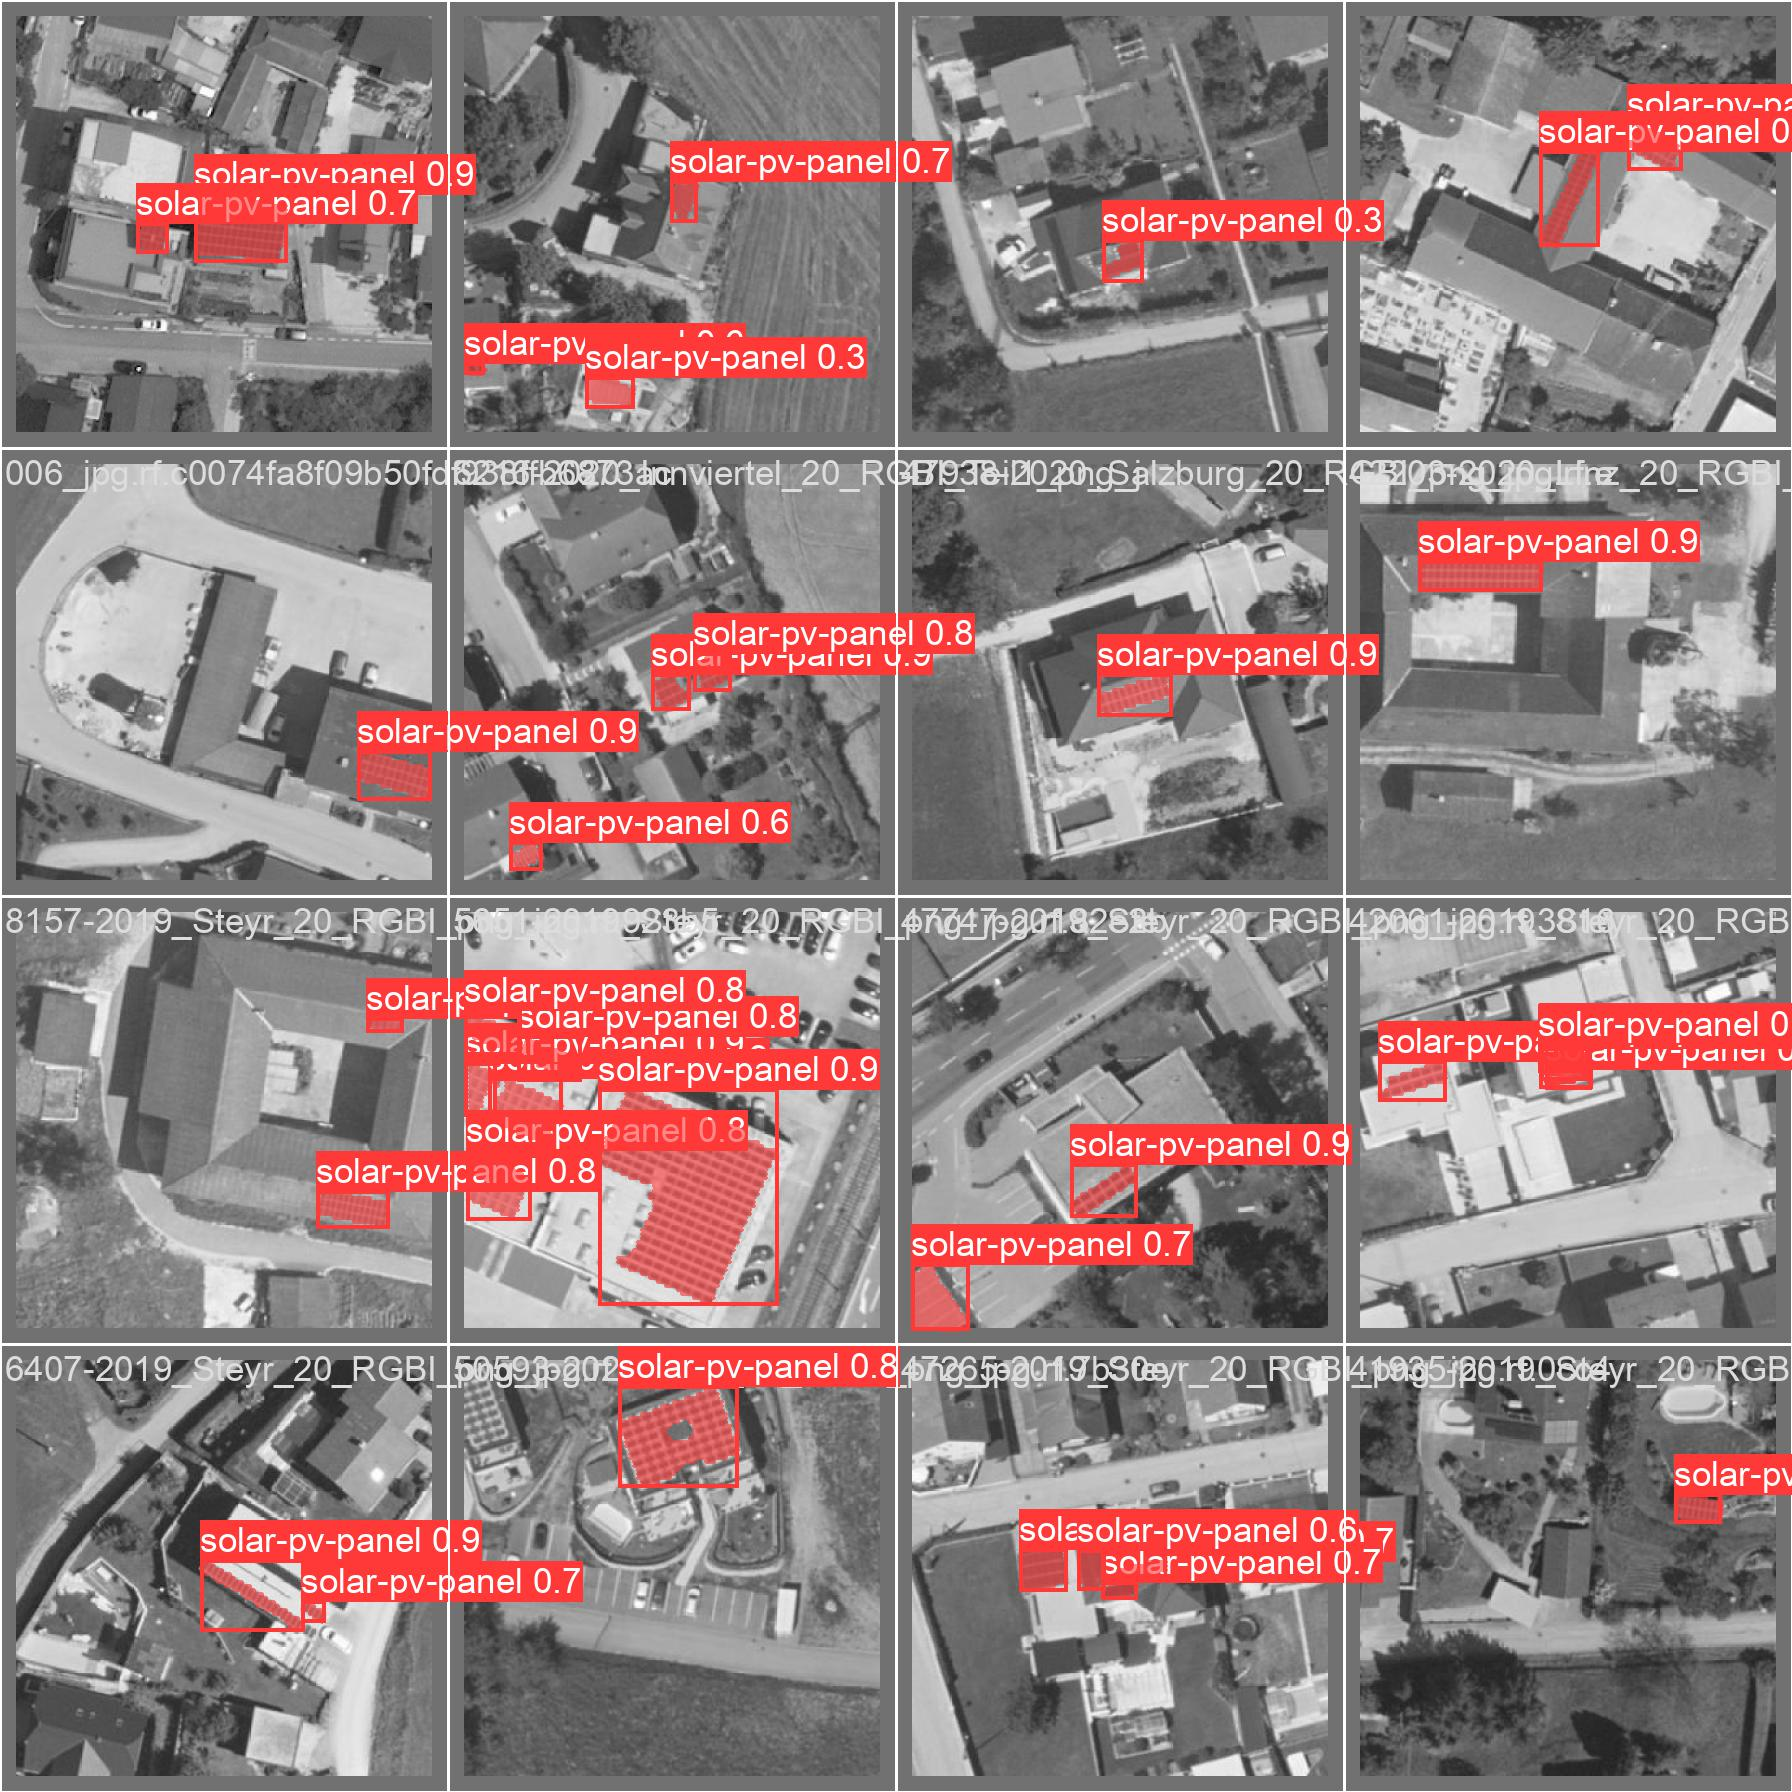

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validation

In [ ]:
%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-17 17:53:10.101917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:53:10.948509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/solar-pv-panel-detection-3/valid/labels.cache... 85 images, 0 backgrounds, 0 corrupt: 100% 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.27s/it]
                   all         85        402      0.741      0.625 

## Inference with Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-05-17 17:53:39.216769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:53:40.476510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/70 /content/datasets/solar-pv-panel-detection-3/test/images/002_jpg.rf.70699f7941cd6f038272f8e37bb28236.jpg: 640x640 4 solar-pv-panels, 20.9ms
image 2/70 /content/datasets/solar-pv-panel-detection-3/test/images/006_jpg.rf.7aa8a0f96d5650b53f3cddba6400067e.jpg: 640x640 1 solar-pv-panel, 21.0ms
image 3/70 /content/datasets/solar-pv-panel-detection-3/test/images/010_jpg.rf.

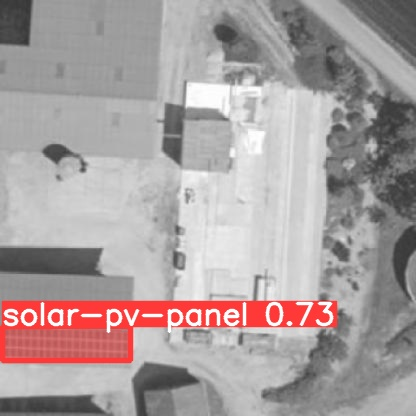

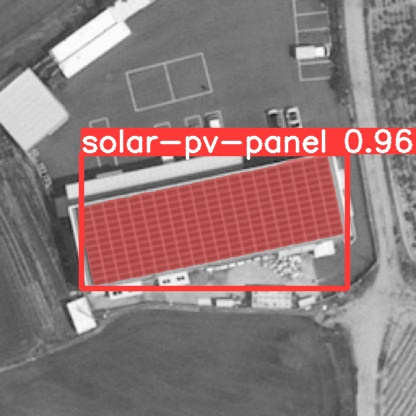

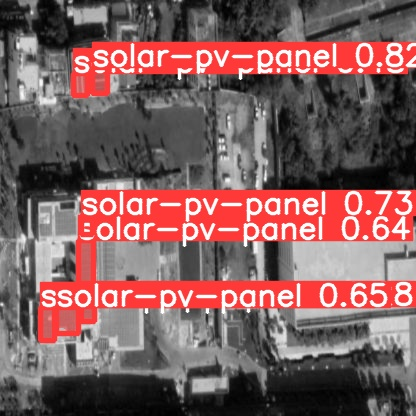

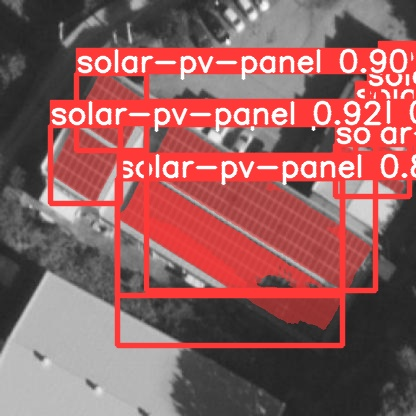

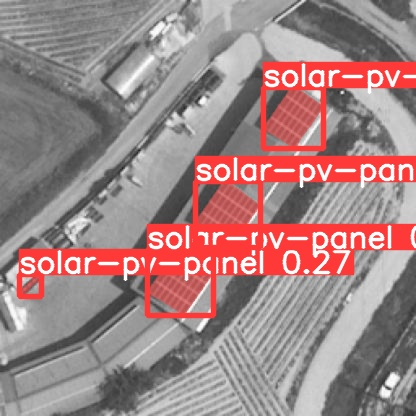

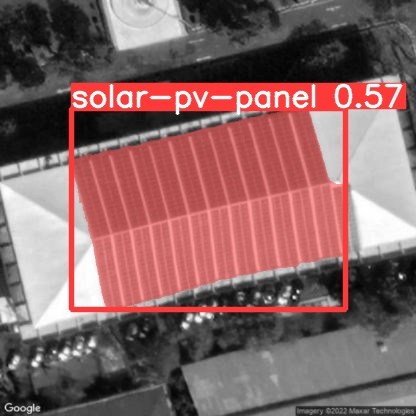

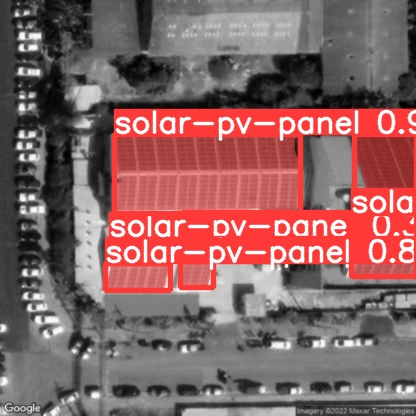

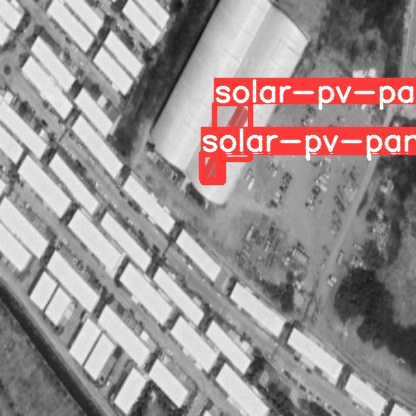

In [ ]:

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:8]:
      display(Image(filename=image_path, height=400))
      print("\n")

# Object detection with YOLOv8

## Some imports and installations

In [ ]:
!pip install -q ultralytics==8.0.28 roboflow

In [ ]:
# to insure there is GPU available on colab
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import os
import glob

import ultralytics

from IPython import display
display.clear_output()

from roboflow import Roboflow
ultralytics.checks()

HOME = os.getcwd()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


## Get data and model

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="Zb4pcvMi97a7q432SywJ")

project = rf.workspace("solarpaneldetectionjamaica").project("jamaican-solar-panel-detection")
dataset = project.version(11).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Jamaican-Solar-Panel-Detection-11 in yolov8:: 100%|██████████| 2824/2824 [00:01<00:00, 2192.35it/s]


## Training

In [ ]:
%cd {HOME}
! yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 164MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Jamaican-Solar-Panel-Detection-11/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

/content


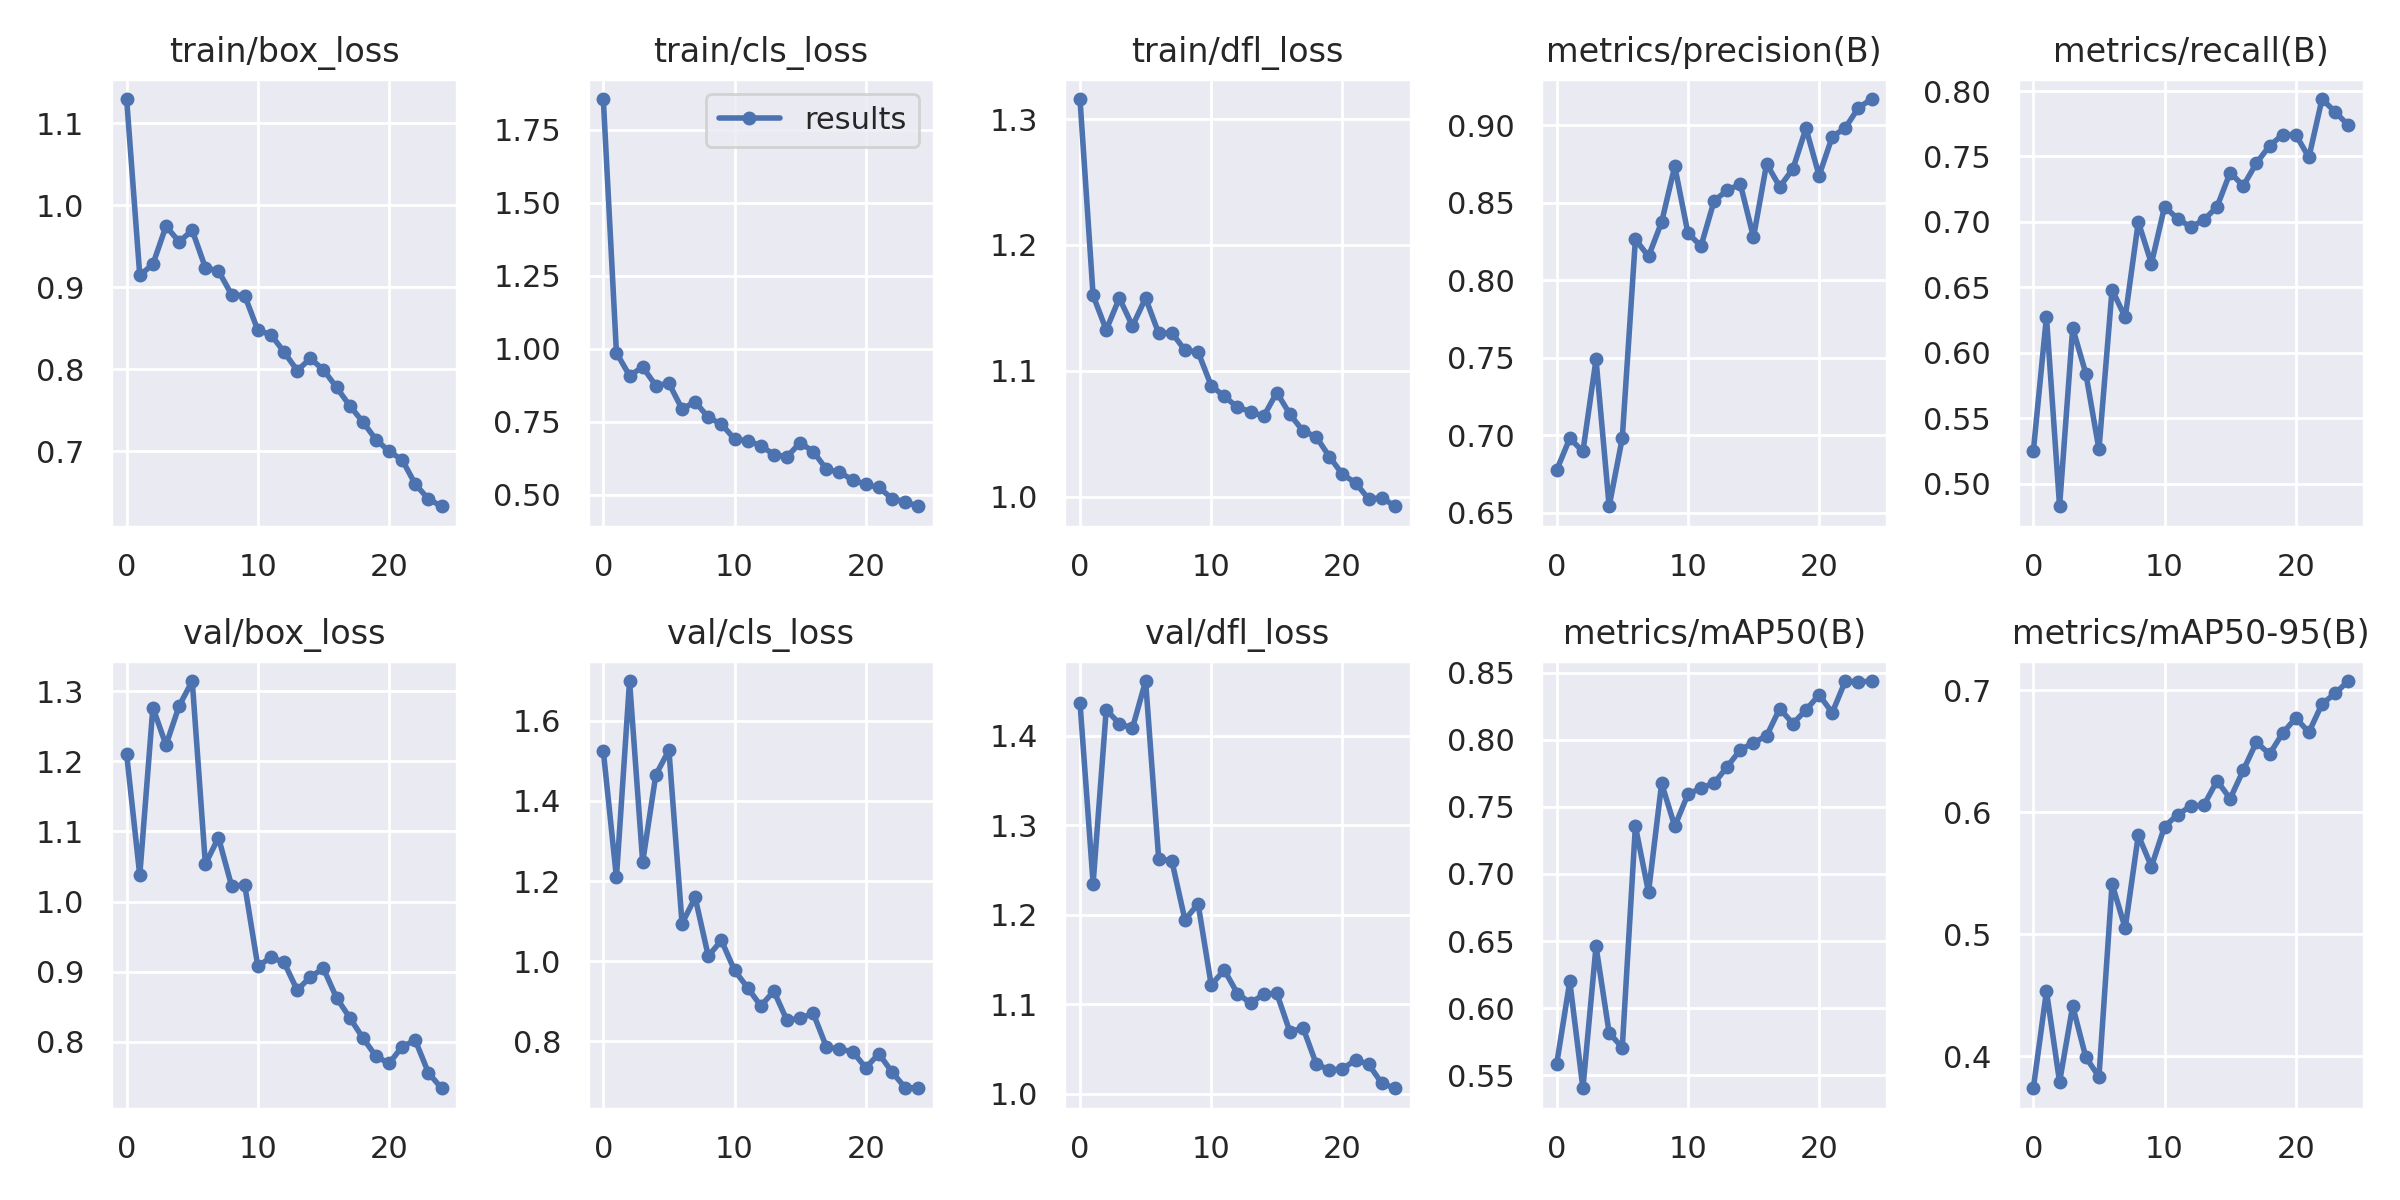

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


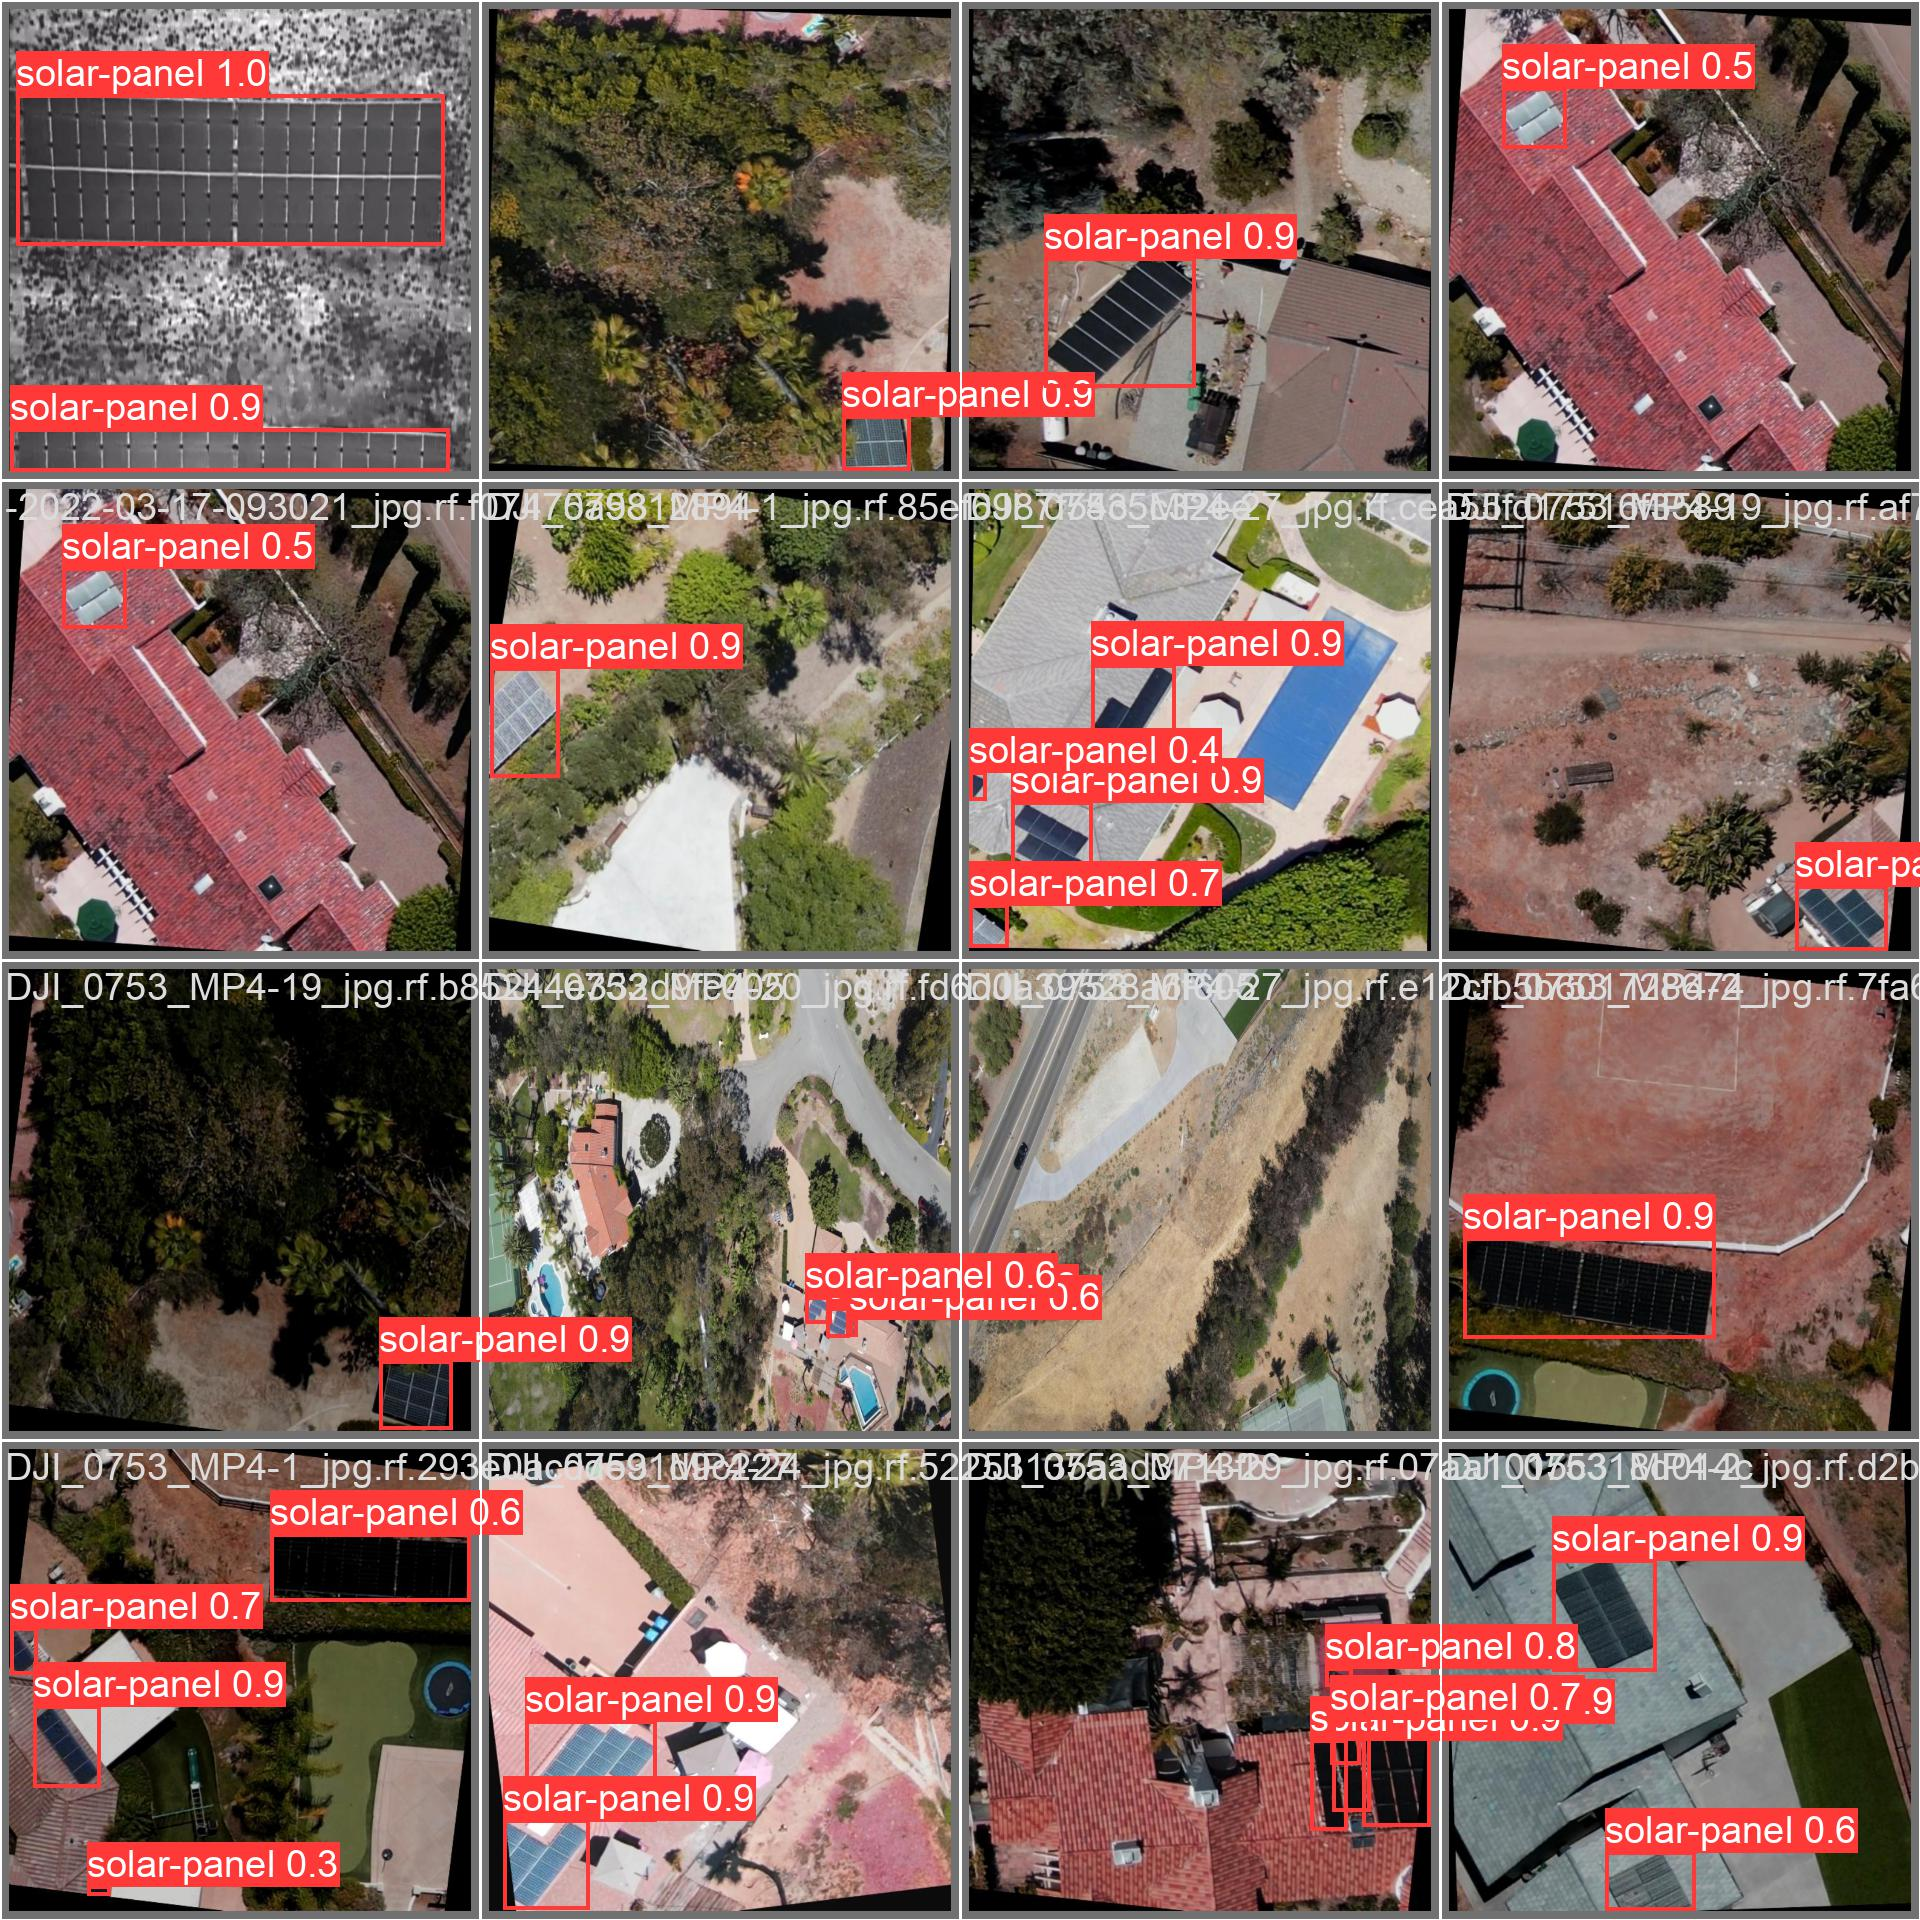

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validation

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-17 17:17:57.465850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:17:58.603086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Jamaican-Solar-Panel-Detection-11/valid/labels.cache... 228 images, 2 backgrounds, 0 corrupt: 100% 228/228 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 178, len(boxes) = 690. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment data

## Inference with Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-17 17:18:35.376597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:18:36.259413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/82 /content/datasets/Jamaican-Solar-Panel-Detection-11/test/images/006_jpg.rf.97e105381d23e240e2eecaa0fe2d42cc.jpg: 640x640 2 solar-panels, 16.4ms
image 2/82 /content/datasets/Jamaican-Solar-Panel-Detection-11/test/images/024_jpg.rf.96070ef91219a8541a90347d0e9def1c.jpg: 640x640 2 solar-panels, 16.3ms
image 3/82 /content/datasets/Jamaican-Solar-Panel-Detection-11/test/images/0

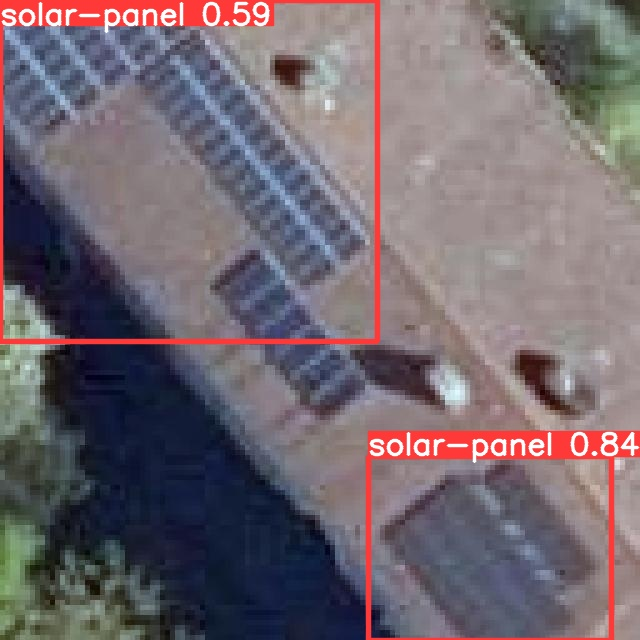

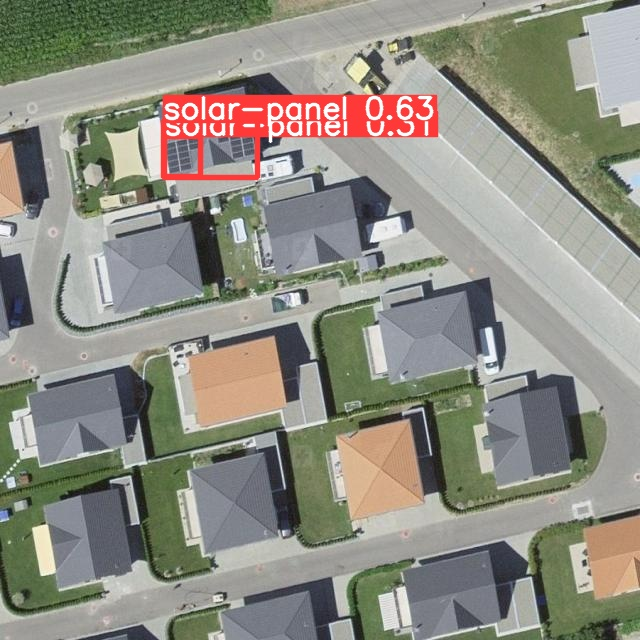

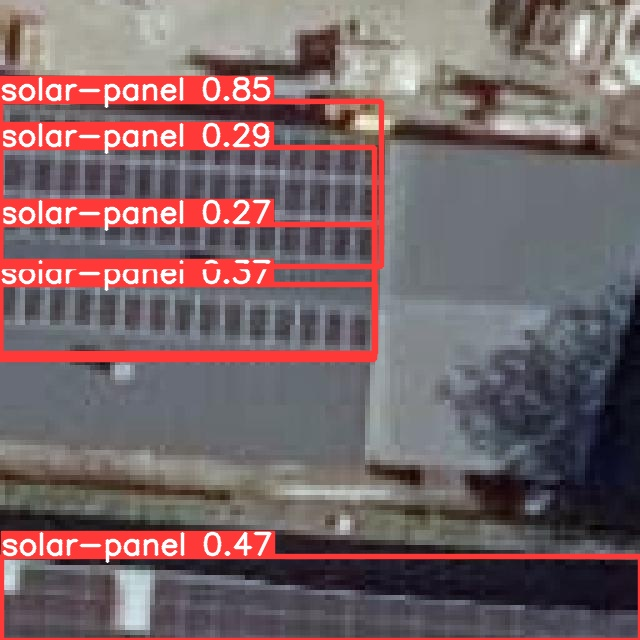

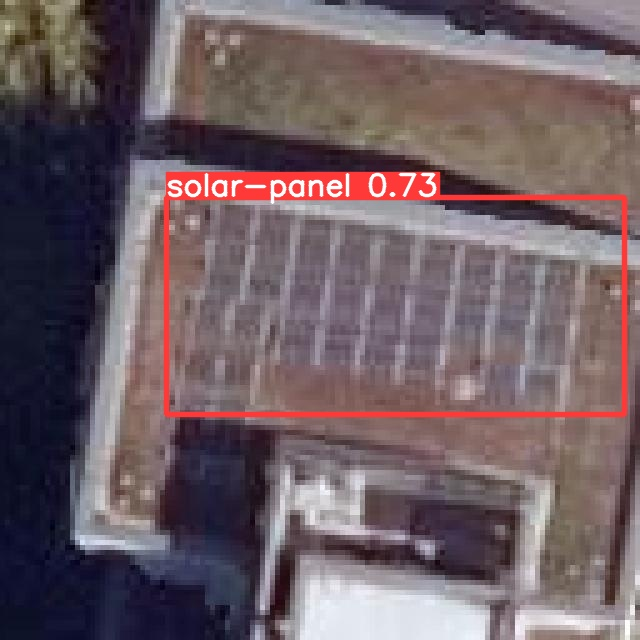

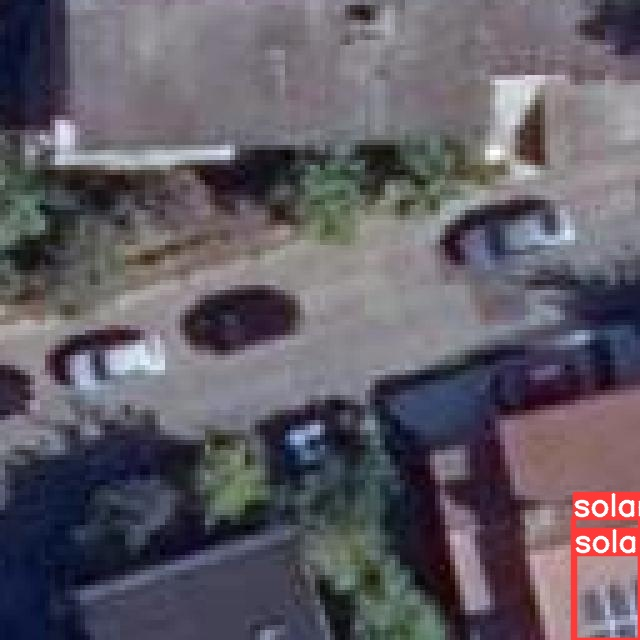

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[5:10]:
      display(Image(filename=image_path, width=300))
      print("\n")

# Test fine-tuned models

In [ ]:
# This is google drive link to output of models and datasets
# For detailed look and more information check the link below
# https://drive.google.com/drive/folders/1EpF7KrExkRMmCQftwkBl1GD6-WCxNOp-?usp=share_link

In [ ]:
!pip install -q ultralytics==8.0.28 roboflow gdown

# Get weights for object detection model
!gdown --folder https://drive.google.com/drive/folders/1fiyuCCcxbm4PRLaKAXG7EpsOy0uXBkuf?usp=sharing
!mv weights detect

# Get weights for instance segmentation model
!gdown --folder https://drive.google.com/drive/folders/1Zv5cfCFjw8UME9JigQCDGUcdr2U-ALg_?usp=share_link
!mv weights segment

# Get image
!wget 'https://media.licdn.com/dms/image/D5622AQHlUirpkNS5aw/feedshare-shrink_800/0/1682643405952?e=1686787200&v=beta&t=31OiUuMdno3jkD2wF0T3wavXD2SRkeCsB-d8wJm5ebE'  -O test.jpeg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 333.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.6 MB/s eta 0:00:00
Retrieving folder list
Processing file 19CGOopJ4Qu-Fl1uO-60oF2w7v_g5-hJI best.pt
Processing file 19BCSfPpyk3RontjRC9pDMhfUzbZA1uj8 last.pt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=19CGOopJ4Qu-Fl1uO-60oF2w7v_g5-hJI
To: /content/weights/best.pt
100% 22.5M/22.5M [00:00<00:00, 24.0MB/s]
D

## Some imports

In [ ]:
import os
import glob

import ultralytics

from IPython import display
display.clear_output()

from roboflow import Roboflow
ultralytics.checks()

HOME = os.getcwd()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Path to a random image

In [ ]:
# Define path to a image you wish to test
path_to_test_image = "./test.jpeg"

## Predict and show an image for object detection

In [ ]:
# Prediction
!yolo task=detect mode=predict model={HOME}/detect/best.pt conf=0.25 source={path_to_test_image} save=True

2023-05-20 03:09:43.284477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 03:09:44.199305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test.jpeg: 480x640 4 solar-panels, 64.7ms
Speed: 0.6ms pre-process, 64.7ms inference, 333.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


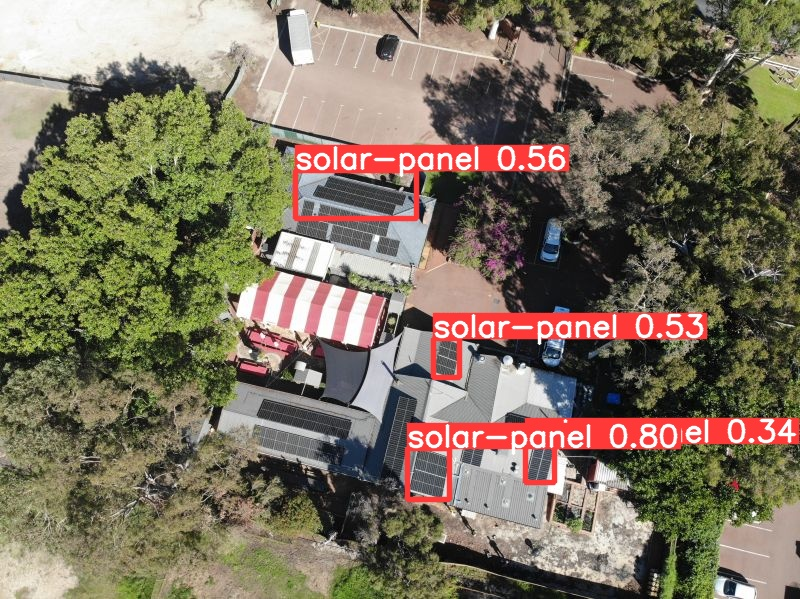

In [ ]:
# Show results
%cd {HOME}
Image(filename=f'runs/detect/predict/{path_to_test_image}', height=500)

/content


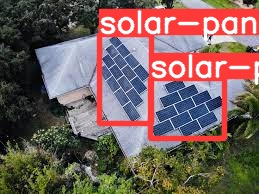

In [ ]:
# Show results
%cd {HOME}
Image(filename=f'runs/detect/predict/{path_to_test_image}', height=500)

## Predict and show an image for instance segmentation

In [ ]:
# Prediction
!yolo task=segment mode=predict model={HOME}/segment/best.pt conf=0.25 source={path_to_test_image} save=True

2023-05-20 03:10:32.551620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 03:10:33.498165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/test.jpeg: 480x640 9 solar-pv-panels, 77.6ms
Speed: 0.6ms pre-process, 77.6ms inference, 132.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


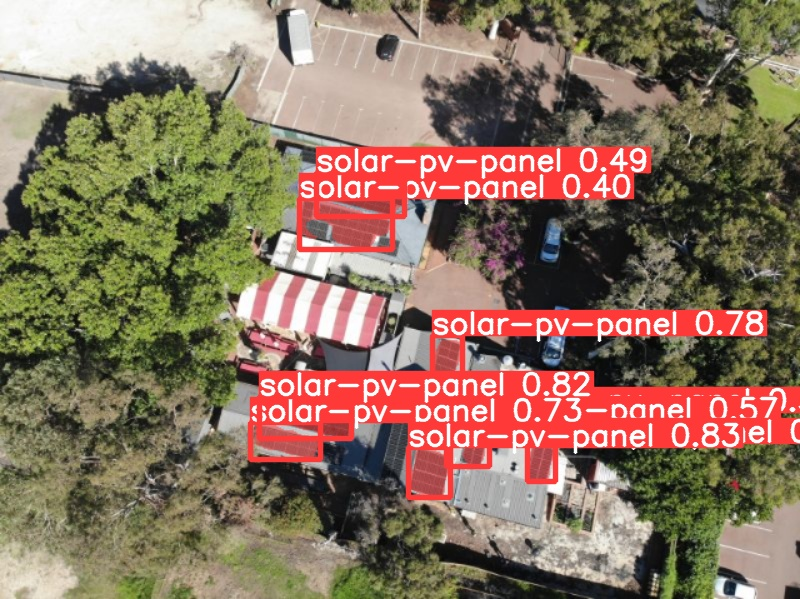

In [ ]:
# Show results
%cd {HOME}
Image(filename=f'runs/segment/predict/{path_to_test_image}', height=500)

/content


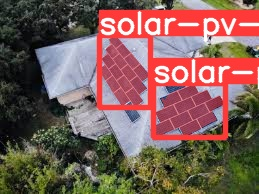

In [ ]:
# Show results
%cd {HOME}
Image(filename=f'runs/segment/predict/{path_to_test_image}', height=500)